In [ ]:
!pip install scikit-fuzzy

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly as py
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import skfuzzy as fuzz
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin
from sklearn.metrics import silhouette_score
import joblib
from keras.models import Sequential
from keras.layers import Dense
# Đọc dữ liệu
uploaded = files.upload()
df = pd.read_csv('Mall_Customers.csv')

Saving Mall_Customers.csv to Mall_Customers (3).csv


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [ ]:
# Kiểm tra giá trị thiếu
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


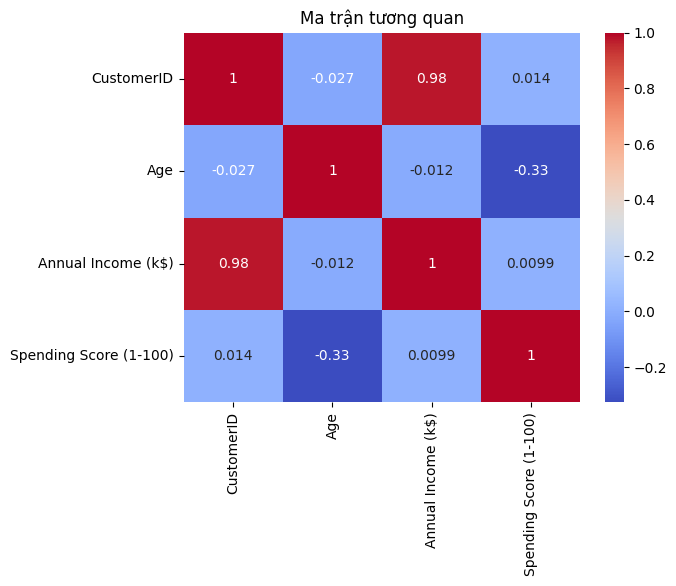

In [ ]:
# Chọn các cột liên quan
data = df[['CustomerID','Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']]

data['Gender'] = pd.to_numeric(data['Gender'], errors='coerce')

# Option 2: Drop the 'Gender' column from the data DataFrame
data = data.drop('Gender', axis=1)
# Tính ma trận tương quan
corr_matrix = data.corr()

# Hiển thị ma trận tương quan
print(corr_matrix)

# Vẽ ma trận tương quan
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

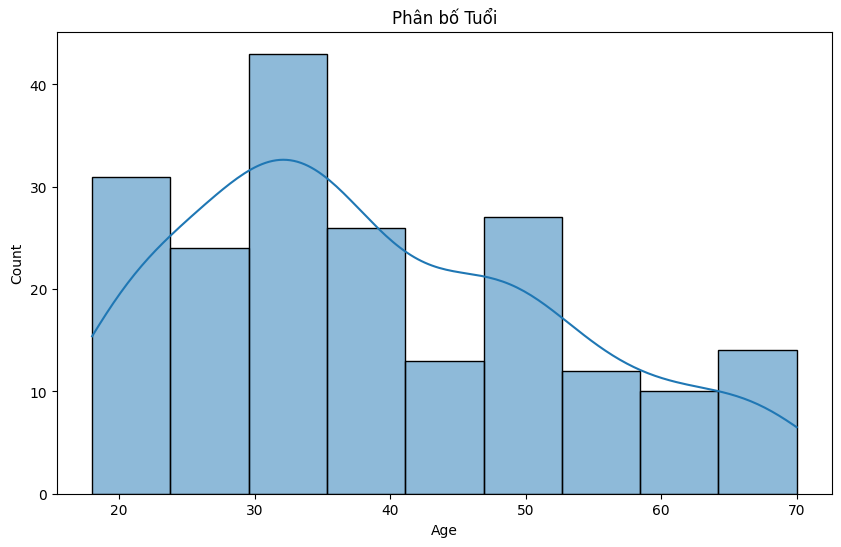

In [ ]:
# Vẽ một số biểu đồ để phân tích dữ liệu
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Phân bố Tuổi')
plt.show()

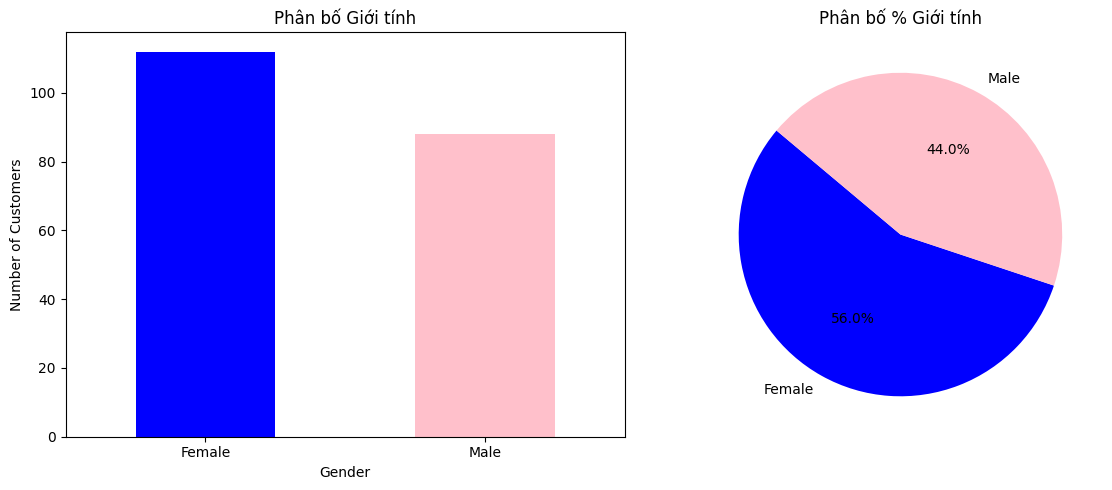

In [ ]:
gender_counts = df['Gender'].value_counts()
gender_percentage = (gender_counts / gender_counts.sum()) * 100

#Vẽ biểu đồ phân bố giới tính
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#Số lượng giới tính
gender_counts.plot(kind='bar', color=['blue', 'pink'], ax=ax[0])
ax[0].set_title('Phân bố Giới tính')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Number of Customers')
ax[0].set_xticklabels(['Female', 'Male'], rotation=0)

# Biểu đồ phần trăm giới tính
gender_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'pink'], ax=ax[1], startangle=140)
ax[1].set_title('Phân bố % Giới tính')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

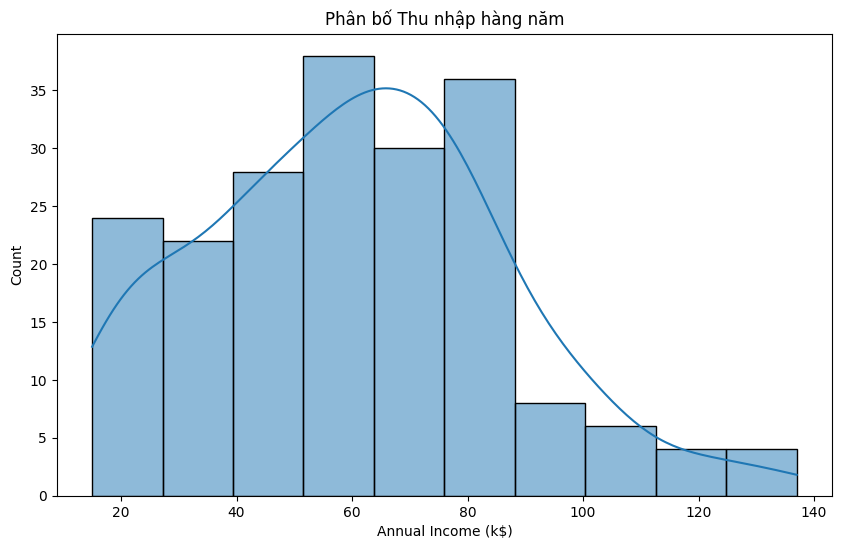

In [ ]:
# Vẽ một số biểu đồ để phân tích dữ liệu
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Phân bố Thu nhập hàng năm')
plt.show()

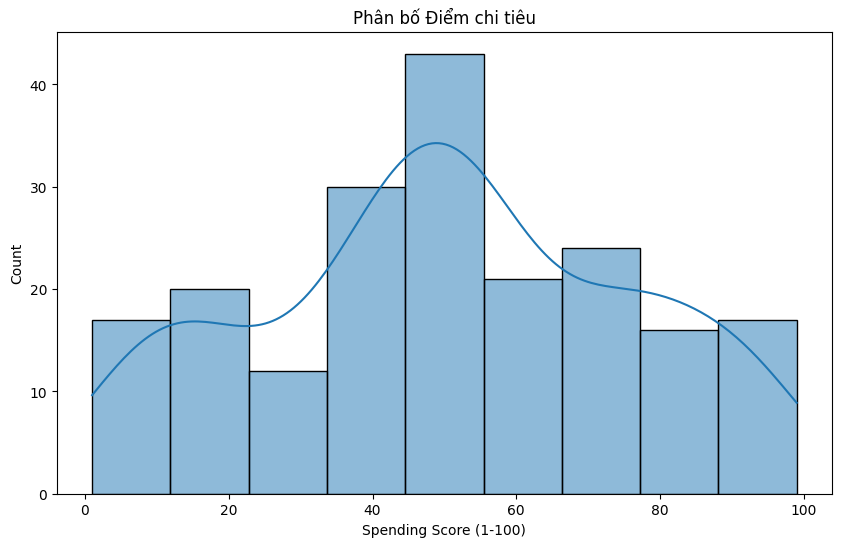

In [ ]:
# Vẽ một số biểu đồ để phân tích dữ liệu
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Phân bố Điểm chi tiêu')
plt.show()

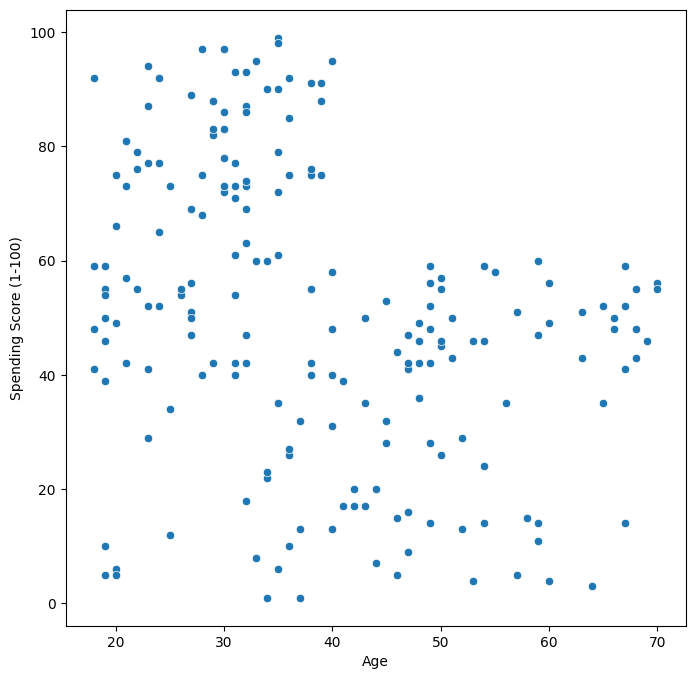

In [ ]:
# Create a pairplot to view the distribution and pairwise correlations between numeric variables
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Age', y = 'Spending Score (1-100)', data = df)
plt.show()

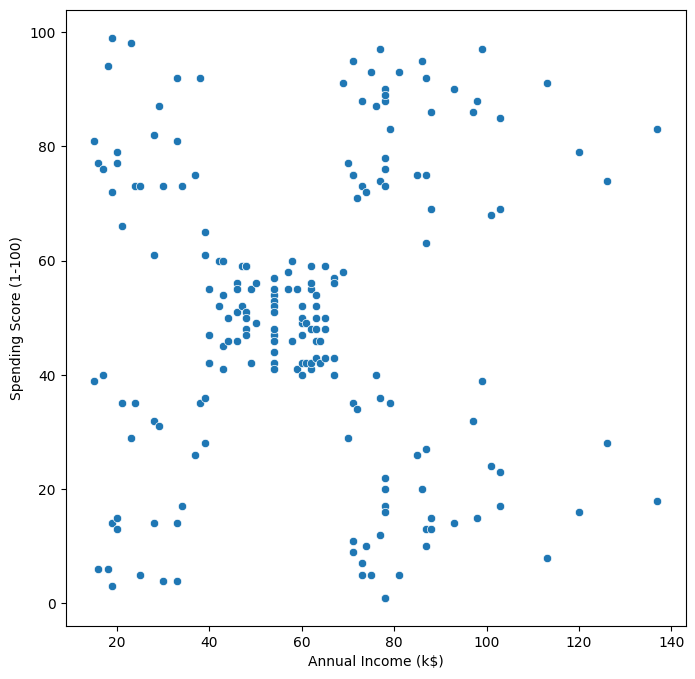

In [ ]:
# Create a pairplot to view the distribution and pairwise correlations between numeric variables
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)
plt.show()

In [ ]:
import plotly.graph_objs as go
import plotly as py
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'],
        size= 5,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clustering',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

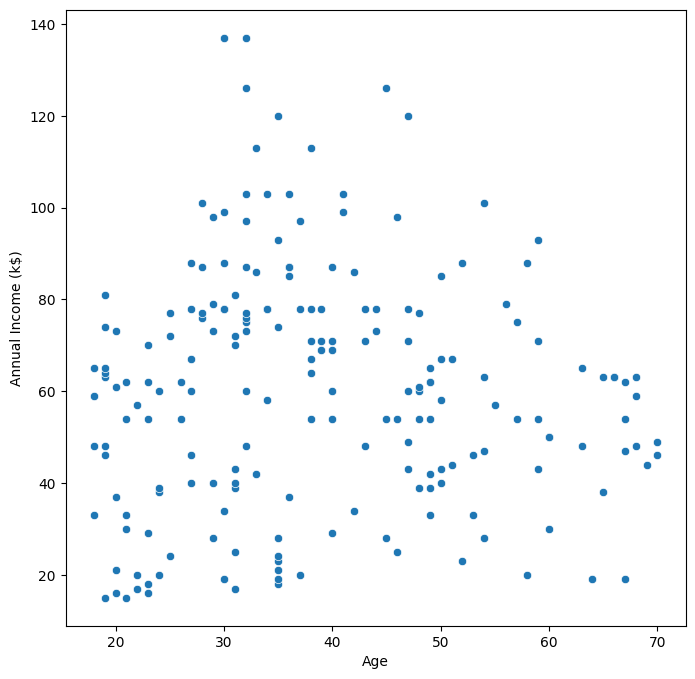

In [ ]:
# Create a pairplot to view the distribution and pairwise correlations between numeric variables
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Age', y = 'Annual Income (k$)', data = df)
plt.show()

<ipython-input-8-558cba006d53>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'pastel')
<ipython-input-8-558cba006d53>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'pastel')
<ipython-input-8-558cba006d53>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'pastel')


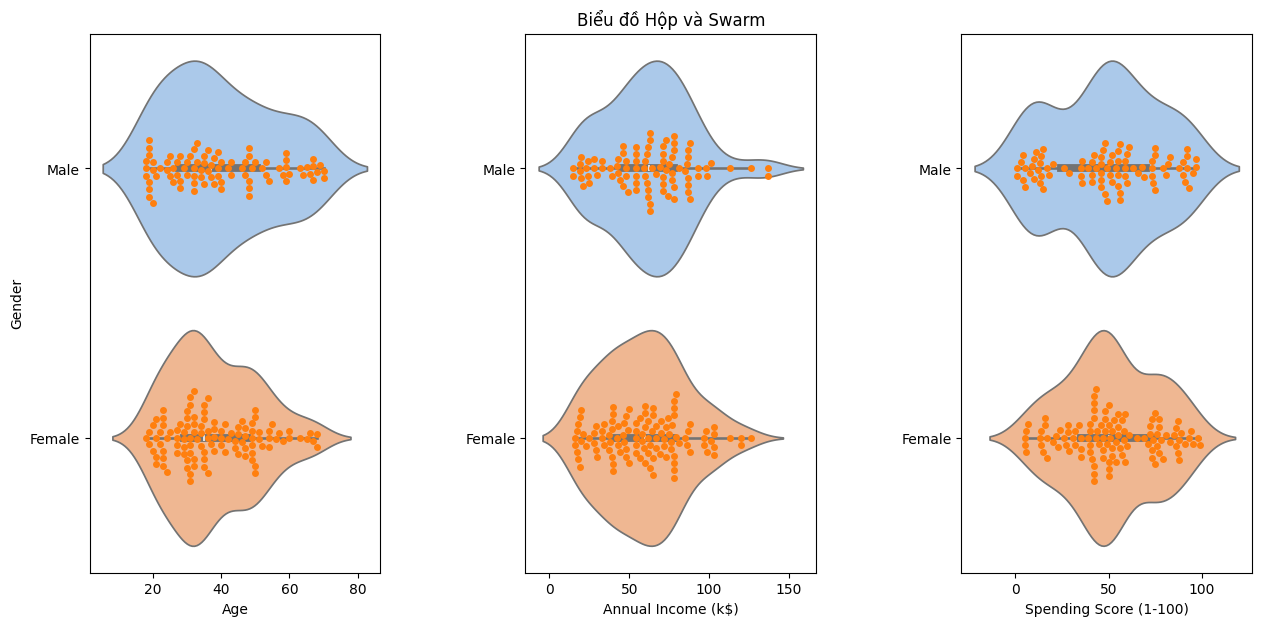

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'pastel')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Biểu đồ Hộp và Swarm' if n == 2 else '')
plt.show()

In [ ]:
# Mã hóa biến phân loại (Giới tính)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[[ 'Annual Income (k$)', 'Spending Score (1-100)']])
# Chuyển đổi lại thành DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=[ 'Annual Income', 'Spending Score'])


In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test = train_test_split(df_scaled, test_size=0.3, random_state=42)

In [ ]:
# Tạo đối tượng AgglomerativeClustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=5)

hc_labels = agglomerative_clustering.fit_predict(X_train)

# Vẽ dendrogram
#Z = linkage(X_train, 'ward')
#plt.figure(figsize=(10, 7))
#dendrogram(Z)
#plt.title('Dendrogram')
#plt.show()
#print(f'Số phần tử trong X_train: {X_train.shape[0]}')
print(f'Số phần tử trong hc_labels: {len(hc_labels)}')

Số phần tử trong hc_labels: 200


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

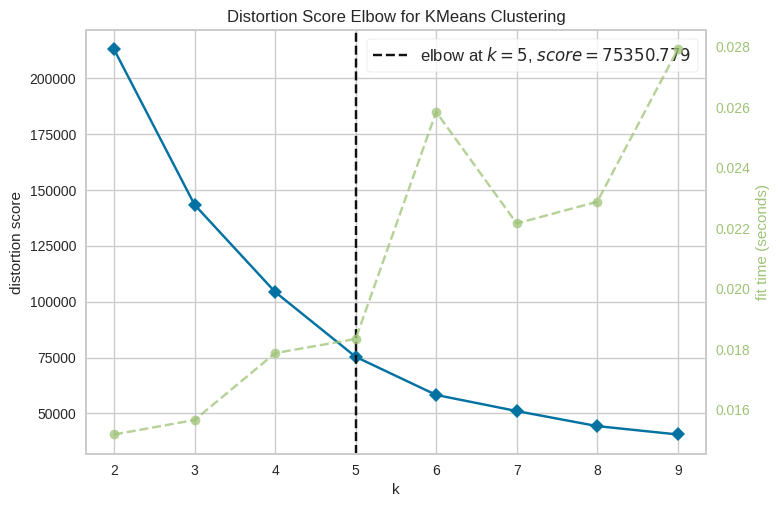

In [ ]:
X_numerics = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


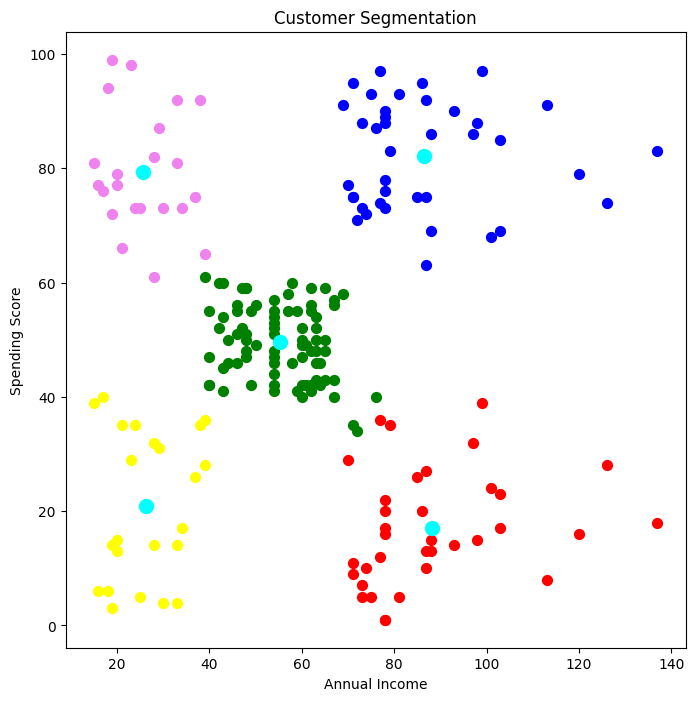

In [ ]:

# Áp dụng K-Means
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X_train)
X_train = data.iloc[:,[0,1]].values
# Vẽ đồ thị - tất cả các cụm và Centroid của chúng

plt.figure(figsize=(8,8))
plt.scatter(X_train[kmeans_labels==0,0], X_train[kmeans_labels==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X_train[kmeans_labels==1,0], X_train[kmeans_labels==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X_train[kmeans_labels==2,0], X_train[kmeans_labels==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X_train[kmeans_labels==3,0], X_train[kmeans_labels==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X_train[kmeans_labels==4,0], X_train[kmeans_labels==4,1], s=50, c='blue', label='Cluster 5')

# vẽ đồ thị trọng tâm
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## **Thuật toán K-Means tạo ra 5 cụm sau:  **
###       Nhóm 1: Khách hàng có thu nhập trung bình hàng năm và chi tiêu hàng năm trung bình
###       Nhóm 2: Khách hàng có thu nhập hàng năm cao nhưng chi tiêu hàng năm thấp
###     Nhóm 3: Khách hàng có thu nhập hàng năm thấp và chi tiêu hàng năm thấp
###   Nhóm 4: Khách hàng có thu nhập hàng năm thấp nhưng chi tiêu hàng năm cao
### Nhóm 5: Khách hàng có thu nhập hàng năm cao và chi tiêu hàng năm cao

In [ ]:

#kmeans.predict([[15,39]])
#result=kmeans.predict([[10,10]])
#print(result)

In [ ]:

# Áp dụng Fuzzy C-Means
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(X_train.T, c=5, m=2, error=0.005, maxiter=1000, init=None)
fcm_labels = np.argmax(u, axis=0)


In [ ]:

# Đánh giá Hierarchical Clustering
hc_silhouette = silhouette_score(X_train, hc_labels)

# Đánh giá K-Means
kmeans_silhouette = silhouette_score(X_train, kmeans_labels)

# Đánh giá Fuzzy C-Means
fcm_silhouette = silhouette_score(X_train, fcm_labels)

print(f"Cụm phân cấp - Silhouette Score: {hc_silhouette}")
print(f"K-Means - Silhouette Score: {kmeans_silhouette}")
print(f"Fuzzy C-Means - Silhouette Score: {fcm_silhouette}")

Cụm phân cấp - Silhouette Score: 0.5529945955148897
K-Means - Silhouette Score: 0.553931997444648
Fuzzy C-Means - Silhouette Score: 0.553931997444648


In [ ]:

# Tạo class cho Fuzzy C-Means để sử dụng trong Stacking
class FuzzyCMeans(BaseEstimator, ClusterMixin, TransformerMixin):
    def __init__(self, c=5, m=3, error=0.005, maxiter=1000):
        self.c = c
        self.m = m
        self.error = error
        self.maxiter = maxiter

    def fit(self, X, y=None):
        self.cntr, self.u, _, _, _, _, _ = fuzz.cluster.cmeans(X.T, c=self.c, m=self.m, error=self.error, maxiter=self.maxiter, init=None)
        return self
    def predict(self, X):
      u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(X.T, self.cntr, self.m, self.error, self.maxiter)
      return np.argmax(u, axis=0)
    #def predict(self, X):
     #   _, u, _, _, _, _, _ = fuzz.cluster.cmeans_predict(X.T, self.cntr, self.m, self.error, self.maxiter)
      #  return np.argmax(u, axis=0)

# Tạo class cho AgglomerativeClustering để sử dụng trong Stacking
class AgglomerativeTransformer(TransformerMixin):
    def __init__(self, n_clusters=5):
        self.n_clusters = n_clusters
        self.model = AgglomerativeClustering(n_clusters=n_clusters)

    def fit(self, X, y=None):
        self.model.fit(X)
        return self

    def transform(self, X):
        labels = self.model.fit_predict(X)
        return labels.reshape(-1, 1)

# Kết hợp các mô hình phân cụm bằng Stacking
estimators = [
    ('kmeans', KMeans(n_clusters=5, random_state=42)),
    #('hc', AgglomerativeClustering(n_clusters=5)),
    ('fcm', FuzzyCMeans(c=5, m=2, error=0.005, maxiter=1000))

]

stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking.fit(X_train, kmeans_labels)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

StackingClassifier(estimators=[('kmeans',
                                KMeans(n_clusters=5, random_state=42)),
                               ('fcm', FuzzyCMeans(m=2))],
                   final_estimator=LogisticRegression())

In [ ]:

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
# Compile mô hình
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình

  # Nếu các nhãn là số nguyên, sử dụng sparse_categorical_crossentropy
if np.issubdtype(hc_labels.dtype, np.integer):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, hc_labels, epochs=50, batch_size=10, validation_split=0.2)
else:
    # One-hot encode labels
    hc_labels_one_hot = to_categorical(hc_labels, num_classes=5)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, hc_labels_one_hot, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
16/16 [==============================] - 2s 42ms/step - loss: 2.1289 - accuracy: 0.4812 - val_loss: 3.0064 - val_accuracy: 0.0250
Epoch 2/50
16/16 [==============================] - 0s 15ms/step - loss: 0.9101 - accuracy: 0.6625 - val_loss: 1.6377 - val_accuracy: 0.5000
Epoch 3/50
16/16 [==============================] - 0s 15ms/step - loss: 0.7527 - accuracy: 0.6687 - val_loss: 1.4466 - val_accuracy: 0.5750
Epoch 4/50
16/16 [==============================] - 0s 10ms/step - loss: 0.6780 - accuracy: 0.6875 - val_loss: 2.4483 - val_accuracy: 0.4500
Epoch 5/50
16/16 [==============================] - 0s 11ms/step - loss: 0.6192 - accuracy: 0.7250 - val_loss: 2.2966 - val_accuracy: 0.4750
Epoch 6/50
16/16 [==============================] - 0s 10ms/step - loss: 0.6894 - accuracy: 0.7063 - val_loss: 2.8268 - val_accuracy: 0.4500
Epoch 7/50
16/16 [==============================] - 0s 9ms/step - loss: 0.6147 - accuracy: 0.7125 - val_loss: 1.8578 - val_accuracy: 0.6500
Epoch 8/50
16/

In [ ]:

# Lưu mô hình Kmeans - tốt nhất
joblib.dump(kmeans, 'kmeans_modellll.pkl')


['kmeans_modellll.pkl']